### Лабораторная работа №2

### Вариант №23

In [244]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import sklearn as skl
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

SEPAL_LENGTH = 'Sepal Length (cm)'
SEPAL_WIDTH = 'Sepal Width (cm)'
PETAL_LENGTH = 'Petal Length (cm)'
PETAL_WIDTH = 'Petal Width (cm)'
SPECIES = 'Species'

x = pd.read_csv('iris.data.csv')
data_pandas = pd.DataFrame(x)
data_pandas.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [245]:
data_pandas.shape

(150, 5)

In [246]:
data_pandas.count()

Sepal Length (cm)    150
Sepal Width (cm)     150
Petal Length (cm)    150
Petal Width (cm)     150
Species              150
dtype: int64

In [247]:
data_pandas.groupby([SPECIES]).mean()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm)
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### 1)Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт):


| Переменная   | Описание     | Параметры(Ключи)                       | 
|--------------|--------------|----------------------------------------|
|Sepal Length (cm)|Длина чашелистника в см|Любой числовой|
|Sepal Width (cm)|Ширина чашелистника в см|Любой числовой|
|Petal Length (cm)|Длина лепестка в см|Любой числовой|
|Petal Width (cm)|Ширина лепестка в см|Любой числовой|
|Species|вид|1. Iris Setosa 2. Iris Versicolour 3. Iris Virginica|

**Задача: по данным признакам предсказать класс растения.**

Лишних признаков нет

### 2)Удалите дубликаты строк в наборе данных:

In [248]:
data_pandas = data_pandas.drop_duplicates()
data_pandas.shape

(147, 5)

### 3)Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая):

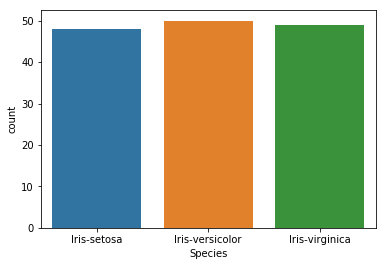

In [249]:
sns.countplot(data=data_pandas, x=SPECIES)
plt.show()

Колличетсво данных по каждому классу незначительно отличается, считаем, что классы сбалансированны.

### 4)Выполните масштабирование количественных признаков

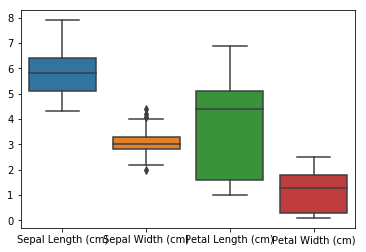

In [250]:
numerical_columns = [SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH]
sns.boxplot(data=data_pandas[numerical_columns])
plt.show()

**Нормализуем данные**

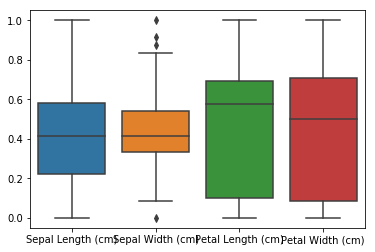

In [251]:
scaler = preprocessing.MinMaxScaler()
data_pandas[numerical_columns] = scaler.fit_transform(data_pandas[numerical_columns].values.astype(float))
sns.boxplot(data=data_pandas[numerical_columns])
plt.show()

### 5)Выполните замену категориальных признаков; выберите и обоснуйте способ замены:

In [252]:
lb_make = LabelEncoder() 
data_pandas[SPECIES] = lb_make.fit_transform(data_pandas[SPECIES])
data_pandas.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


### 6)Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации):

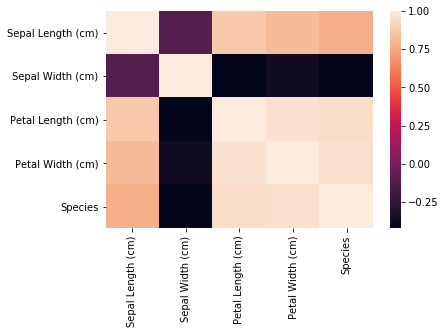

In [253]:
df_corr = data_pandas.corr()
sns.heatmap(df_corr)
plt.show()

In [254]:
df_corr

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Sepal Length (cm),1.000000,-0.109321,0.871305,0.817058,0.782904
Sepal Width (cm),-0.109321,1.000000,-0.421057,-0.356376,-0.418348
Petal Length (cm),0.871305,-0.421057,1.000000,0.961883,0.948339
Petal Width (cm),0.817058,-0.356376,0.961883,1.000000,0.955693
Species,0.782904,-0.418348,0.948339,0.955693,1.000000


### 7)Заполните пропущенные значения в данных:

Пропущеных значений нет

### 8)Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию:

In [255]:
X = np.array(data_pandas.drop(SPECIES, axis=1))
y = np.array(data_pandas[SPECIES]) 
y = label_binarize(y, classes=[x for x in range(3)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(73, 4)
(74, 4)


In [256]:
rnc = RadiusNeighborsClassifier()
rnc.get_params()
params = {'radius': np.linspace(0.4, 1, 20)[1:],
         'leaf_size': np.linspace(1, 2, 20)[1:]}
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)
y_score = rnc_grid.best_estimator_.fit(X_train, y_train).predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_score, y_test)))
print('Best score: {}'.format(rnc_grid.best_score_))

Accuracy: 0.9054054054054054
Best score: 0.9041095890410958


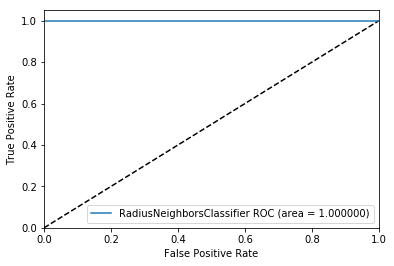

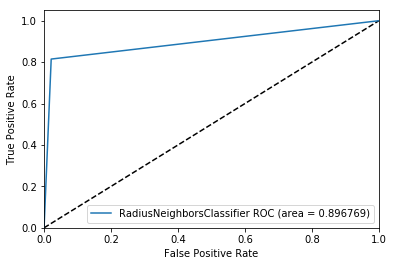

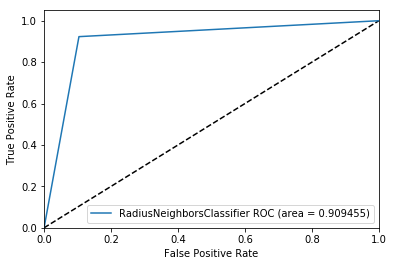

In [257]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC (area = %f)' % ('RadiusNeighborsClassifier', roc_auc[i]))  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4, fontsize='medium')
    plt.show()

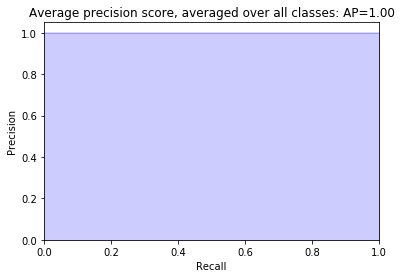

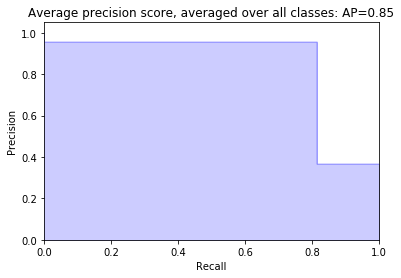

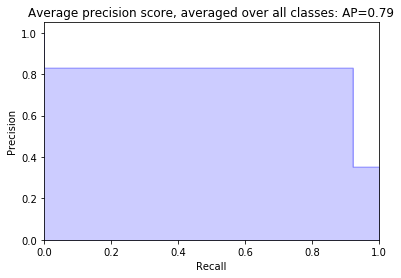

In [258]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, averaged over all classes: AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

In [259]:
clf_perceptron = OneVsRestClassifier(linear_model.Perceptron())
params = {
      'estimator__alpha': np.linspace(0, 1, 50)[1:],
      'estimator__max_iter': [(x+1)*10 for x in range(10)],
      }
param_search = GridSearchCV(estimator=clf_perceptron, param_grid=params)
param_search.fit(X_train, y_train)
y_score = param_search.best_estimator_.fit(X_train, y_train).decision_function(X_test)
print('Accuracy: {}'.format(accuracy_score(param_search.best_estimator_.predict(X_test), y_test)))
print('Best score: {}'.format(param_search.best_score_))

Accuracy: 0.47297297297297297
Best score: 0.7945205479452054


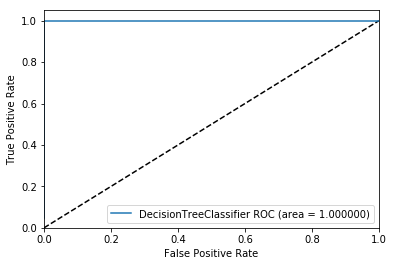

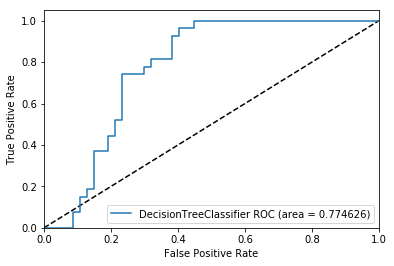

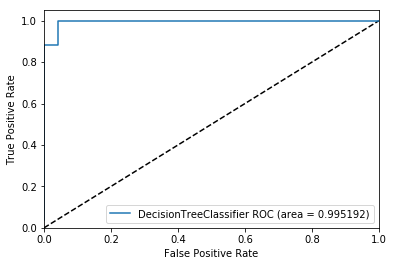

In [260]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(3):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr[i], tpr[i], label='%s ROC (area = %f)' % ('DecisionTreeClassifier', roc_auc[i]))  
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=4, fontsize='medium')
    plt.show()

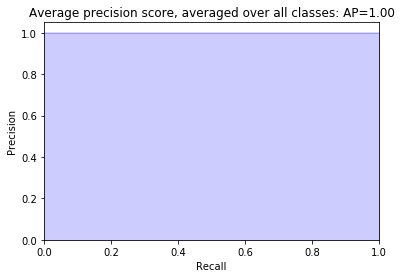

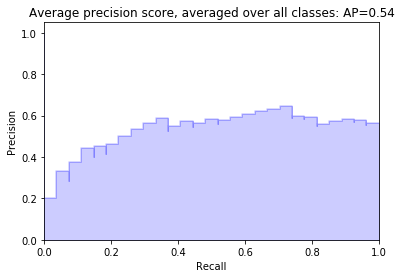

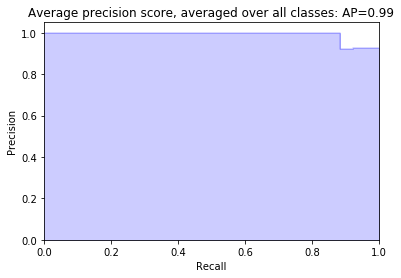

In [261]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(3):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

    plt.figure()
    plt.step(recall[i], precision[i], color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall[i], precision[i], step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(
        'Average precision score, averaged over all classes: AP={0:0.2f}'
        .format(average_precision[i]))
    plt.show()

### 9)Сравните кривые для классификаторов, указанных в задании, сделайте выводы:

Классификаторы персептрон и k ближайших соседей(по радиусу) имеют примерно одинаковые показатели качества относительно PR и ROC кривых. Данные классификаторы хорошо справляются со своей задачей. Задача классификации была решена.